## Plotting Example
Today's code is highly repetitive. This is to make it easy to see changes that I'm making as I develop the plot. In reality, I would be editing the same chunk of code, being sure to push to Github frequently in case I break my code. And then I would bundle it into a function (removing the duplicate code in the global namespace)

Do not turn in work that looks like this notebook!!!! You must always clean up your code

### Mauna Loa Weekly Atmospheric CO2 Data
https://www.statsmodels.org/devel/datasets/generated/co2.html

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
data = sm.datasets # to access statsmodels built-in datasets

In [196]:
df = data.co2.load_pandas().data
df.head() # intermediary output, don't forget to remove it!

,co2
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4


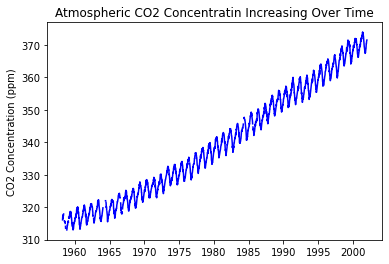

In [118]:
fig, ax = plt.subplots()
ax.plot(df.index, df['co2'], 'b-')
ax.set_title('Atmospheric CO2 Concentratin Increasing Over Time')
ax.set_ylabel('CO2 Concentration (ppm)')
plt.show()

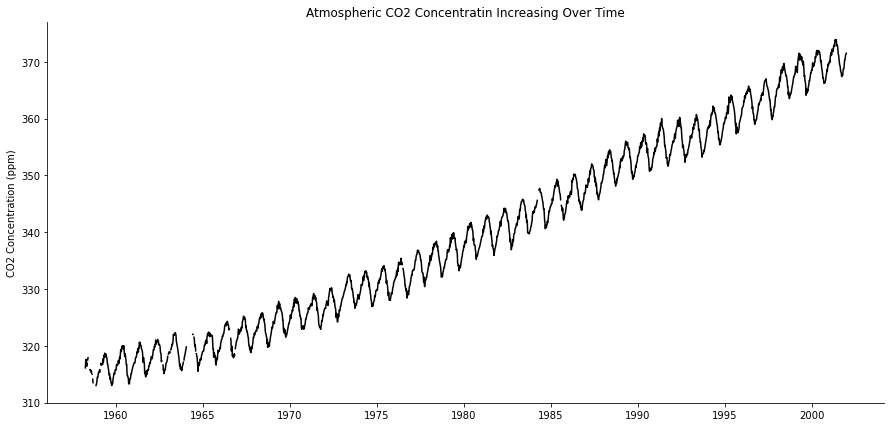

In [119]:
fig, ax = plt.subplots(figsize= (15,7))
ax.plot(df.index, df['co2'], 'black')
ax.set_title('Atmospheric CO2 Concentratin Increasing Over Time')
ax.set_ylabel('CO2 Concentration (ppm)')
ax.spines['right'].set_visible(False) 
ax.spines['top'].set_visible(False)

plt.show()

In [120]:
df.index[0]

Timestamp('1958-03-29 00:00:00', freq='W-SAT')

This is alreayd a Timestamp, so I could just work with it as it.
But since you'll likely be working with columns more that with data in an index,
let's work with this as a column

In [197]:
df.reset_index(inplace = True)
df.columns

Index(['index', 'co2'], dtype='object')

In [198]:
df.rename(columns={'index':'date'}, inplace = True)
df.head()

,date,co2
0,1958-03-29,316.1
1,1958-04-05,317.3
2,1958-04-12,317.6
3,1958-04-19,317.5
4,1958-04-26,316.4


In [145]:
 df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d').map(lambda d: d.year)

In [147]:
df.head() 

,date,co2
0,1958,316.1
1,1958,317.3
2,1958,317.6
3,1958,317.5
4,1958,316.4


In [146]:
df['date'][0]

1958

In [161]:
use_df = df.groupby(df['date']).mean().reset_index()
use_df.head()

,date,co2
0,1958,315.420000
1,1959,315.906250
2,1960,316.860377
3,1961,317.592308
4,1962,318.545833


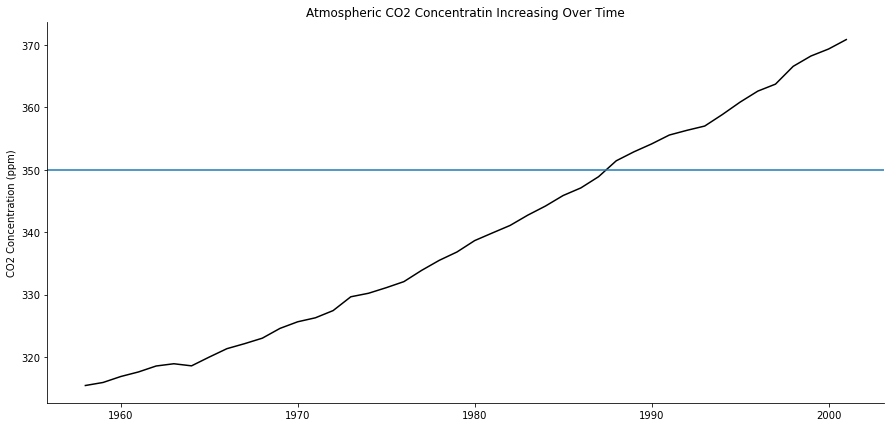

In [163]:
fig, ax = plt.subplots(figsize= (15,7))
ax.plot(use_df['date'], use_df['co2'], 'black')
ax.set_title('Atmospheric CO2 Concentratin Increasing Over Time')
ax.set_ylabel('CO2 Concentration (ppm)')
ax.spines['right'].set_visible(False) 
ax.spines['top'].set_visible(False)
ax.axhline(y = 350)
# cite: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.axhline.html
plt.show()        

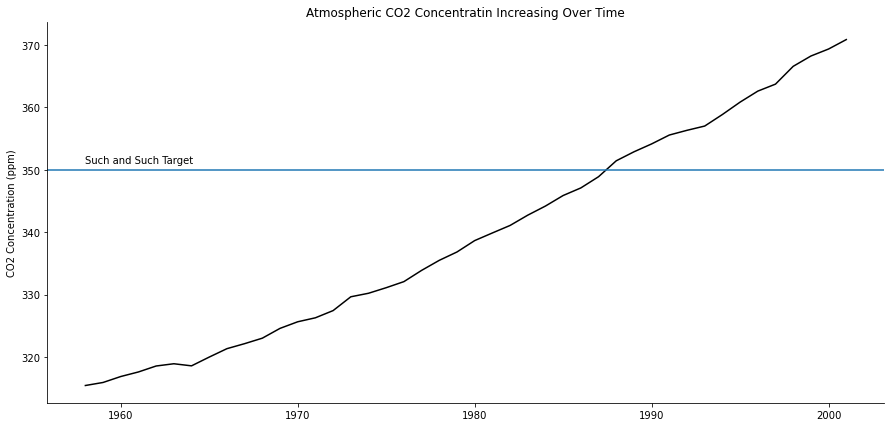

In [167]:
fig, ax = plt.subplots(figsize= (15,7))
ax.plot(use_df['date'], use_df['co2'], 'black')
ax.set_title('Atmospheric CO2 Concentratin Increasing Over Time')
ax.set_ylabel('CO2 Concentration (ppm)')
ax.spines['right'].set_visible(False) 
ax.spines['top'].set_visible(False)
ax.axhline(y = 350)
ax.annotate('Such and Such Target', xy=(1958, 351), xycoords = 'data')
#cite: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.axhline.html
#cite: https://matplotlib.org/3.1.0/gallery/text_labels_and_annotations/annotation_demo.html
plt.show()    

### Organize

In [174]:
def read_and_parse_df():
    df = sm.datasets.co2.load_pandas().data
    df.reset_index(inplace = True)
    
    df.rename(columns={'index':'date'}, inplace = True)
    df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d').map(lambda d: d.year)
    
    use_df = df.groupby(df['date']).mean().reset_index()
    
    return use_df


check = read_and_parse_df()

In [175]:
check.head()

,date,co2
0,1958,315.420000
1,1959,315.906250
2,1960,316.860377
3,1961,317.592308
4,1962,318.545833


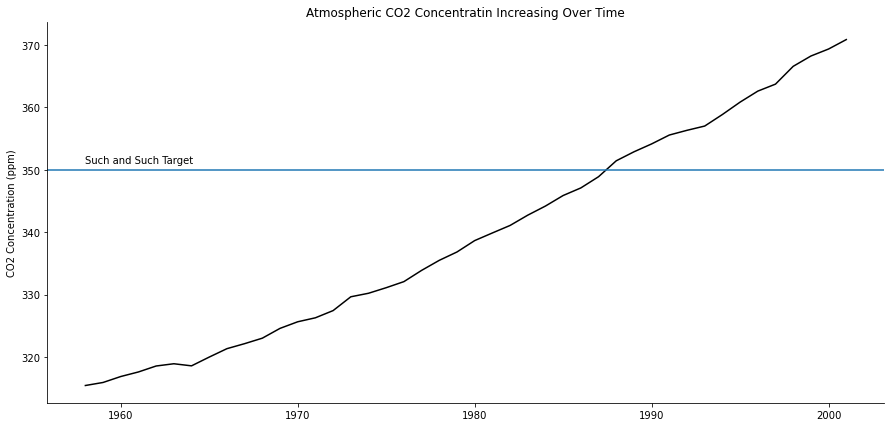

In [177]:
def plot_co2(use_df):
    fig, ax = plt.subplots(figsize= (15,7))
    ax.plot(use_df['date'], use_df['co2'], 'black')
    ax.set_title('Atmospheric CO2 Concentratin Increasing Over Time')
    ax.set_ylabel('CO2 Concentration (ppm)')
    ax.spines['right'].set_visible(False) 
    ax.spines['top'].set_visible(False)
    ax.axhline(y = 350)
    ax.annotate('Such and Such Target', xy=(1958, 351), xycoords = 'data')
    #cite: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.axhline.html
    #cite: https://matplotlib.org/3.1.0/gallery/text_labels_and_annotations/annotation_demo.html
    plt.show() 

plot_co2(check)   

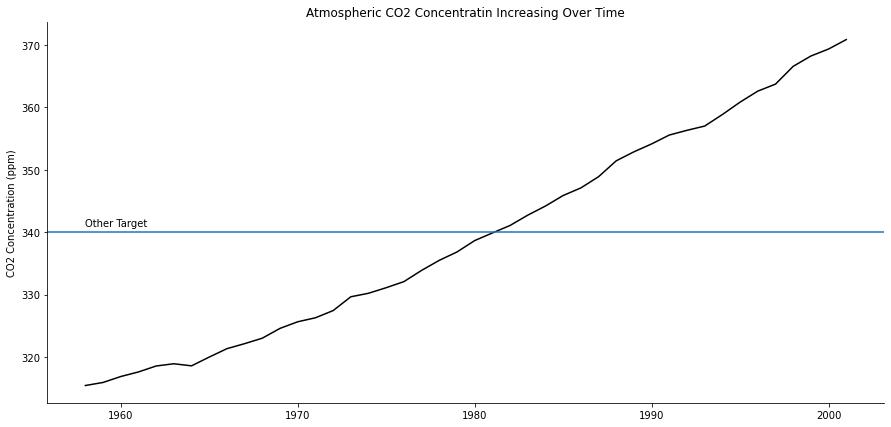

In [178]:
def plot_co2(use_df, target_ppm, target_name):
    '''input is the cleaned and reformatted co2 df,
    an integer for the target pmm of cot
    a string for the name of that target
    output: displayes the plot
    '''
    fig, ax = plt.subplots(figsize= (15,7))
    ax.plot(use_df['date'], use_df['co2'], 'black')
    ax.set_title('Atmospheric CO2 Concentratin Increasing Over Time')
    ax.set_ylabel('CO2 Concentration (ppm)')
    ax.spines['right'].set_visible(False) 
    ax.spines['top'].set_visible(False)
    ax.axhline(y = target_ppm)
    ax.annotate(target_name, xy=(1958, target_ppm+1), xycoords = 'data')
    #cite: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.axhline.html
    #cite: https://matplotlib.org/3.1.0/gallery/text_labels_and_annotations/annotation_demo.html
    plt.show() 

plot_co2(check, 340, 'Other Target') 

In [225]:
def read_and_parse_df():
    df = sm.datasets.co2.load_pandas().data
    use_df = df.resample("M")
    # cite: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html
    
    #use_df = df.groupby(df['date']).mean().reset_index()
    
    use_df.reset_index(inplace = True)
    use_df.rename(columns={'index':'date'}, inplace = True)
    
    return df


month_co2 = read_and_parse_df()

AttributeError: 'DatetimeIndexResampler' object has no attribute 'reset_index'

In [223]:
month_co2

,date,co2
0,1958-03-29,316.1
1,1958-04-05,317.3
2,1958-04-12,317.6
3,1958-04-19,317.5
4,1958-04-26,316.4
...,...,...
2279,2001-12-01,370.3
2280,2001-12-08,370.8
2281,2001-12-15,371.2
2282,2001-12-22,371.3


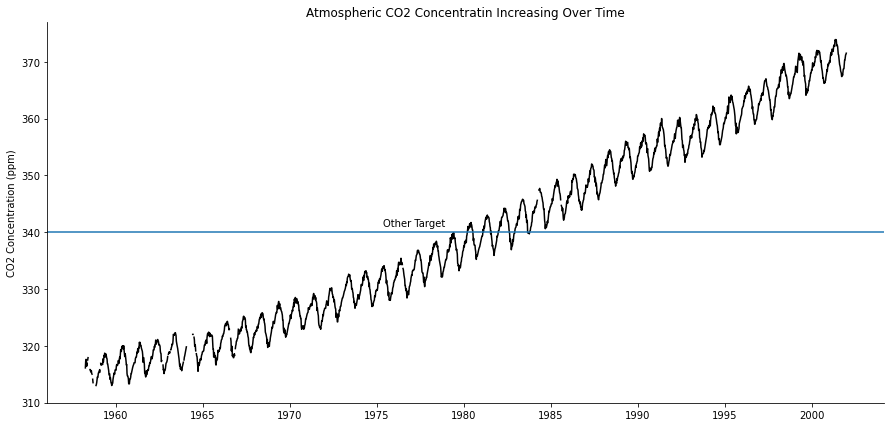

In [224]:
plot_co2(month_co2, 340, 'Other Target') 

In [199]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d').map(lambda d: d.month)
#use_df = df.groupby([df.date.dt.year, df.date.dt.month]).mean()

#use_df.head(5)

In [200]:
df['date'][100]

2